Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [347]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [348]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [349]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(include_bias=True, interaction_only=True)
fi = p.fit_transform(X)
print(fi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [350]:
from numpy import linalg
fi_t = numpy.transpose(fi)
fi_plus = linalg.inv(fi_t.dot(fi)).dot(fi_t)
w = fi_plus.dot(y)
print(w)

w = linalg.pinv(fi).dot(y)
print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [351]:
from sklearn.metrics import mean_squared_error
x_ = fi
for i in range(len(X)):
    print("x" + str(i) + ": " + str(X[i]) + "\t\ty" + str(i) + ": " + str(y[i]))
h_x = x_.dot(numpy.transpose(w))
E = mean_squared_error(h_x, y)
print("\n" + str(E))

x0: [0]		y0: 4
x1: [1]		y1: 1
x2: [2]		y2: 2
x3: [4]		y3: 5

2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [352]:
try:
    linalg.inv(fi)
except LinAlgError as e:
    print("Indeed, " + str(e))

Indeed, Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [353]:
from sklearn.linear_model import LinearRegression
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
reg = LinearRegression().fit(X, y)
print(reg.coef_, reg.intercept_, sep="\t")
pred = reg.predict(X)
print(pred)
print(mean_squared_error(pred, y))

[0.45714286]	2.2
[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [354]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    n = normal(0, noise, len(X))
    return [(f(X[i]) + n[i])[0] for i in range(len(X))]

In [355]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [356]:
X2 = make_instances(-5, 5, 50)
print(str(X2) + "\n")
y2 = make_labels(X2, lambda x: 5 + x - 2*x**2 - 5*x**3, 200)
print(y2)

[[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]
 [ 0.30612245]
 [ 0.51020408]
 [ 0.71428571]
 [ 0.91836735]
 [ 1.12244898]
 [ 1.32653061]
 [ 1.53061224]
 [ 1.73469388]
 [ 1.93877551]
 [ 2.14285714]
 [ 2.34693878]
 [ 2.55102041]
 [ 2.75510204]
 [ 2.95918367]
 [ 3.16326531]
 [ 3.36734694]
 [ 3.57142857]
 [ 3.7755102 ]
 [ 3.97959184]
 [ 4.18367347]
 [ 4.3877551 ]
 [ 4.59183673]
 [ 4.79591837]
 [ 5.        ]]

[473.2728073380077, 538.4776247818606, 420.73865357397017, 225.38150220082133, 290.29002330930217, 249.60409176223303, 459.46525102309937, 45.603791055651556, -173.08655291279095, 210.5066286007592, -446.0414719724413, -21.893710552574532, 42.53886

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

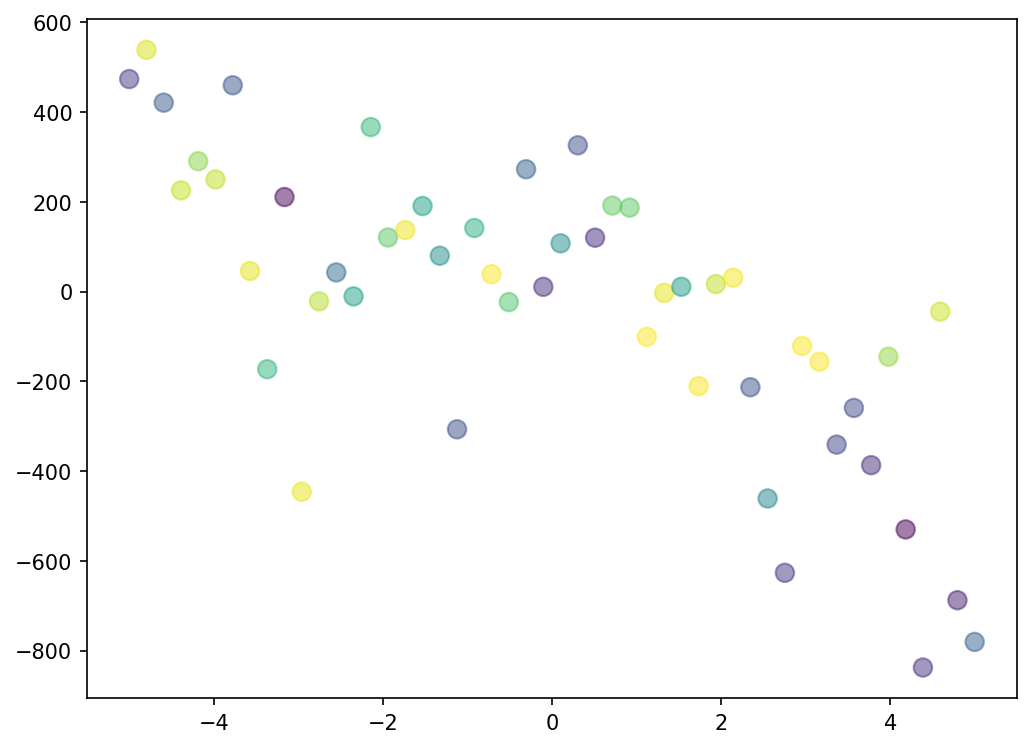

In [357]:
import matplotlib.pyplot as plt
from numpy.random import rand
colors = numpy.random.rand(len(X2))
area = numpy.pi * 5**2  # radijus
figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
plt.scatter(X2, y2, s=area, c=colors, alpha=0.5)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

X:
[[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]
 [ 0.30612245]
 [ 0.51020408]
 [ 0.71428571]
 [ 0.91836735]
 [ 1.12244898]
 [ 1.32653061]
 [ 1.53061224]
 [ 1.73469388]
 [ 1.93877551]
 [ 2.14285714]
 [ 2.34693878]
 [ 2.55102041]
 [ 2.75510204]
 [ 2.95918367]
 [ 3.16326531]
 [ 3.36734694]
 [ 3.57142857]
 [ 3.7755102 ]
 [ 3.97959184]
 [ 4.18367347]
 [ 4.3877551 ]
 [ 4.59183673]
 [ 4.79591837]
 [ 5.        ]]

h(x;w):
[[-5.00000000e+00  2.50000000e+01 -1.25000000e+02]
 [-4.79591837e+00  2.30008330e+01 -1.10310117e+02]
 [-4.59183673e+00  2.10849646e+01 -9.68187150e+01]
 [-4.38775510e+00  1.92523948e+01 -8.44747937e+01]
 [-4.18367347e+00  1.75031237e+01

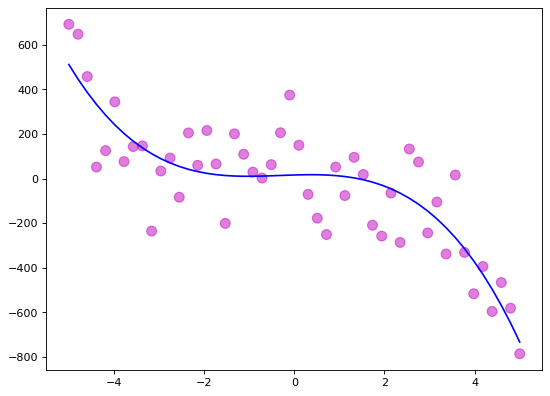

In [358]:
X3 = make_instances(-5, 5, 50)
y3 = make_labels(X3, lambda x: 5 + x - 2*x**2 - 5*x**3, 200)
p = PolynomialFeatures(3, include_bias=False, interaction_only=False)
h_x3_w3 = p.fit_transform(X3)
print("X:\n" + str(X3) + "\n\nh(x;w):\n" + str(h_x3_w3) + "\n\ny:\n" + str(y3))

reg = LinearRegression().fit(h_x3_w3, y3)
pred = reg.predict(h_x3_w3)
print(reg.coef_, reg.intercept_, sep="\n")

E = mean_squared_error(pred, y3)
print("\n" + str(E))


figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
colors = len(pred) * "m"
area = numpy.pi * 5**2  # radijus
plt.scatter(X3, y3, s=area, c=colors, alpha=0.5)
area = numpy.pi * 5**2  # radijus
plt.plot(X3, pred, "b")
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?


Greska modela 1: 38710.00334631327

Greska modela 2: 30528.338427422306

Greska modela 3: 29944.915434868137

Greska modela 4: 24048.313691677977

Greska modela 5: 19955.865230110707




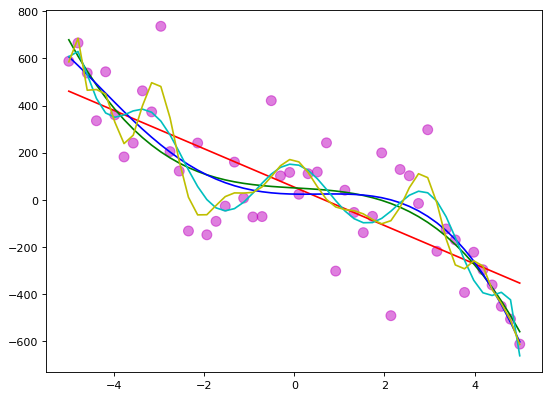

In [359]:
colors_plot = ["r", "g", "b", "c", "y"]
X3 = make_instances(-5, 5, 50)
y3 = make_labels(X3, lambda x: 5 + x - 2*x**2 - 5*x**3, 200)
d_list = [1, 3, 5, 10, 20]

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
colors = len(X3) * "m"
area = numpy.pi * 5**2  # radijus
plt.scatter(X3, y3, s=area, c=colors, alpha=0.5)

for i, d in enumerate(d_list):
    p = PolynomialFeatures(d, include_bias=False, interaction_only=False)
    hi = p.fit_transform(X3)
    reg = LinearRegression().fit(hi, y3)
    pred = reg.predict(hi)
    E = (mean_squared_error(pred, y3))
    print("\nGreska modela " + str(i+1) + ": " + str(E))
    plt.plot(X3, pred, colors_plot[i])
print("\n")
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skup za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

[[-5.        ]
 [ 3.97959184]
 [ 0.51020408]
 [ 1.73469388]
 [-3.97959184]
 [ 0.91836735]
 [-2.75510204]
 [ 2.34693878]
 [-4.79591837]
 [-0.71428571]
 [-4.59183673]
 [ 3.7755102 ]
 [ 2.14285714]
 [-0.30612245]
 [ 3.16326531]
 [-2.95918367]
 [-0.51020408]
 [-1.32653061]
 [ 5.        ]
 [-0.91836735]
 [-3.57142857]
 [ 3.57142857]
 [-2.14285714]
 [ 0.71428571]
 [ 2.75510204]]

[[-2.34693878]
 [ 2.95918367]
 [ 1.12244898]
 [ 4.18367347]
 [-1.53061224]
 [ 4.79591837]
 [ 0.30612245]
 [ 0.10204082]
 [ 1.53061224]
 [-1.12244898]
 [-2.55102041]
 [-4.18367347]
 [ 2.55102041]
 [-3.36734694]
 [-4.3877551 ]
 [-3.7755102 ]
 [ 3.36734694]
 [ 4.3877551 ]
 [ 4.59183673]
 [-1.93877551]
 [-3.16326531]
 [-1.73469388]
 [-0.10204082]
 [ 1.93877551]
 [ 1.32653061]]

[756.867934165883, -175.96250017460113, -145.28272737697628, -45.31217711268977, 148.17256081843462, 45.54637753761922, 109.7870349696991, -145.88776166177934, 656.3934369127893, -238.93322139581687, 504.87151258450626, -45.53190441525322, -262.4

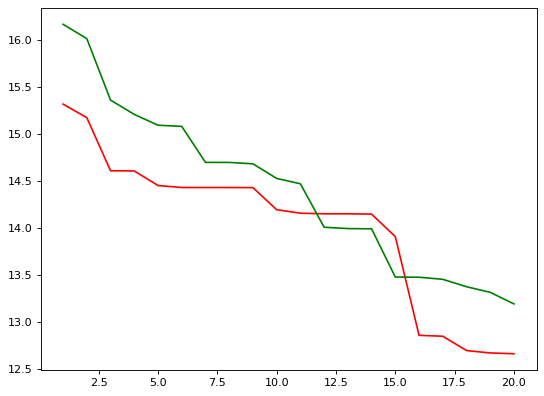

In [360]:
from sklearn.model_selection import train_test_split
X3 = make_instances(-5, 5, 50)
y3 = make_labels(X3, lambda x: 5 + x - 2*x**2 - 5*x**3, 200)
d_list = range(1, 21)
colors_plot = ["r", "g", "b", "c", "m", "y", "k", "orange", "purple", "brown", "pink", "grey", "olive", "lime", "teal", "khaki", "navy", "thistle", "plum", "silver"]
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.5, random_state=42)
print(X_train, X_test, y_train, y_test, sep="\n\n")
E_train = []
E_test = []

for d in d_list:
    p = PolynomialFeatures(d, include_bias=False, interaction_only=False)
    hi = p.fit_transform(X_train)
    reg = LinearRegression().fit(hi, y_train)
    pred = reg.predict(hi)
    E1 = math.log2(mean_squared_error(pred, y_train))
    E_train.append(E1)
    print("\nGreska modela " + str(d) + " na skupu za ucenje: " + str(E1))
    
    hi = p.fit_transform(X_test)
    reg = LinearRegression().fit(hi, y_test)
    pred = reg.predict(hi)
    E2 = math.log2(mean_squared_error(pred, y_test))
    E_test.append(E2)
    print("Greska modela " + str(d) + " na skupu za testiranje: " + str(E2))

print("\n") 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(d_list, E_train, "r")
plt.plot(d_list, E_test, "g")
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

In [361]:
# Vaš kôd ovdje

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [362]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
lambda_list = [0, 1, 10]
p = PolynomialFeatures(3, include_bias=True, interaction_only=True)
fi = p.fit_transform(X)

fi_t = np.transpose(fi)
for l in lambda_list:
    w = np.linalg.inv(fi_t.dot(fi) + l * np.identity(len(fi_t))).dot(fi_t).dot(y)
    print("w za lambda=" + str(l) + " je:\n" + str(w))

w za lambda=0 je:
[2.2        0.45714286]
w za lambda=1 je:
[1.45901639 0.67213115]
w za lambda=10 je:
[0.51168831 0.69090909]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [363]:
from sklearn.linear_model import Ridge
for alfa in lambda_list:
    clf = Ridge(alpha=alfa)
    clf = clf.fit(fi, y)
    print("w za lambda=" + str(alfa) + " je: ")
    print(clf.intercept_, clf.coef_, sep="\t")

w za lambda=0 je: 
2.1999999999999997	[0.         0.45714286]
w za lambda=1 je: 
2.282051282051282	[0.         0.41025641]
w za lambda=10 je: 
2.626666666666667	[0.         0.21333333]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

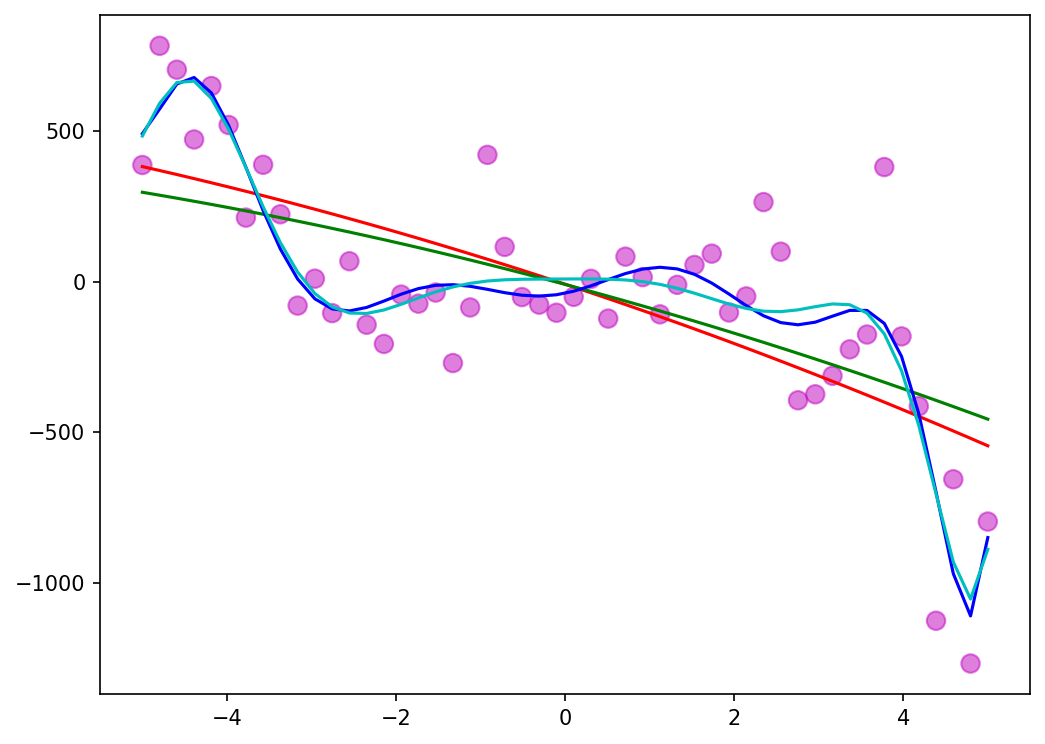

In [364]:
X2 = make_instances(-5, 5, 50)
y2 = make_labels(X2, lambda x: 5 + x - 2*x**2 - 5*x**3, 200)

colors_plot = ["r", "g", "b", "c"]
figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
colors = 2*len(hi) * "m"
area = numpy.pi * 5**2  # radijus
plt.scatter(X2, y2, s=area, c=colors, alpha=0.5)

d_list = [2, 10]
lambda_list = [0, 100]
for i, d in enumerate(d_list):
    p = PolynomialFeatures(d, include_bias=True, interaction_only=False)
    h_x = p.fit_transform(X2)
    for j, l in enumerate(lambda_list):
        clf = Ridge(alpha=l)
        clf = clf.fit(h_x, y2)
        pred = clf.predict(h_x)
        plt.plot(X2, pred, colors_plot[i*2 + j])
plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


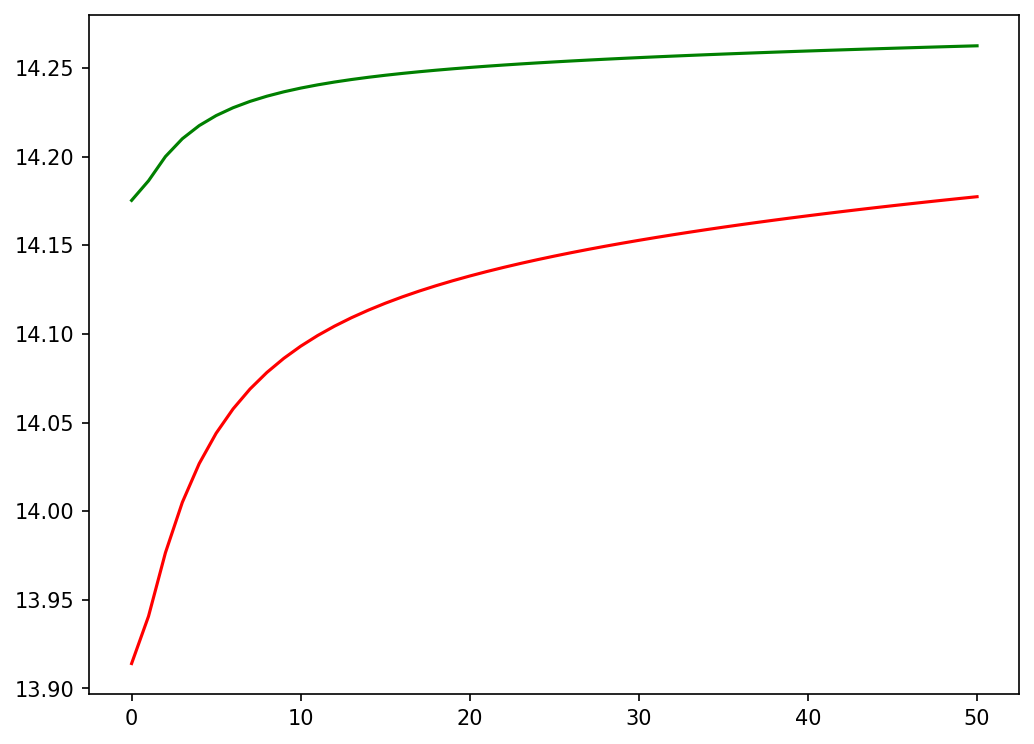

In [377]:
X3 = make_instances(-5, 5, 50)
y3 = make_labels(X2, lambda x: 5 + x - 2*x**2 - 5*x**3, 200)
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.5, random_state=42)

colors_plot = ["r", "g", "b", "c"]

lambda_list = range(51)
E_train = []
E_test = []
for l in lambda_list:
    p = PolynomialFeatures(10, include_bias=True, interaction_only=False)
    hi = p.fit_transform(X_train)
    clf = Ridge(alpha=l)
    clf = clf.fit(hi, y_train)
    pred = clf.predict(hi)
    w = [clf.intercept_, clf.coef_[1]]
    E1 = math.log2(mean_squared_error(pred, y_train) + numpy.linalg.norm(w))
    E_train.append(E1)
    
    hi = p.fit_transform(X_test)
    clf = Ridge(alpha=l)
    clf = clf.fit(hi, y_test)
    pred = clf.predict(hi)
    w = [clf.intercept_, clf.coef_[1]]
    E2 = math.log2(mean_squared_error(pred, y_test) + numpy.linalg.norm(w))
    E_test.append(E2)

figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
plt.plot(lambda_list, E_train, "r")
plt.plot(lambda_list, E_test, "g")
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [366]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [367]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [368]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [369]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

In [370]:
# Vaš kôd ovdje

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [371]:
# Vaš kôd ovdje

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [372]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [373]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [374]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [375]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.